## Setup Environment

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn

## Initial Data Upload

Since this is primarily for data exploration purposes, I will only be importing snippets of the data. I will upload the complete weekly dataset for analysis later on

In [2]:
games = pd.read_csv("../0. Data/games.csv")
players = pd.read_csv("../0. Data/players.csv")
test_week = pd.read_csv("../0. Data/week6.csv")

### Game Exploration

In [3]:
games.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


The games dataframe appears to simply be a log of all the games for which there is weekly data available. As we can see below, that accounts for most game throughout the season - keeping in mind teams have bye weeks so in any given week, there should be between 12-16 matchups. However, bye weeks only start past week 3, so we're already missing a couple of matchups for week 1.

In [4]:
games['week'].value_counts().sort_index()

1     13
2     16
3     16
4     15
5     15
6     15
7     14
8     14
9     13
10    14
11    13
12    15
13    16
14    16
15    16
16    16
17    16
Name: week, dtype: int64

In [5]:
games['homeTeamAbbr'].value_counts()

ARI    8
CIN    8
CAR    8
BUF    8
NYG    8
CLE    8
MIA    8
BAL    8
SEA    8
DET    8
CHI    8
TEN    8
PIT    8
NO     8
GB     8
ATL    8
OAK    8
WAS    8
DAL    8
NE     8
TB     8
NYJ    8
HOU    8
KC     8
JAX    8
IND    8
SF     8
LA     8
PHI    8
MIN    7
LAC    7
DEN    7
Name: homeTeamAbbr, dtype: int64

### Players Exploration

At first glance, the players dataframe appears to be a log of all players, together with their measurables, position and college

In [6]:
players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


The height variable is unclear. It is currently a categorical variables, with 2 and 3 digits values, as well as feet-inches measurements

In [7]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1303 non-null   int64 
 1   height       1303 non-null   object
 2   weight       1303 non-null   int64 
 3   birthDate    1303 non-null   object
 4   collegeName  1303 non-null   object
 5   position     1303 non-null   object
 6   displayName  1303 non-null   object
dtypes: int64(2), object(5)
memory usage: 71.4+ KB


In [8]:
players.height.value_counts()

73      159
72      153
74      141
75      136
71      127
76       90
70       81
77       67
6-2      42
69       37
78       37
6-0      33
5-10     32
6-1      29
5-11     27
6-4      25
6-3      25
68       18
6-5      11
79        9
5-9       9
80        3
67        3
66        2
6-7       2
6-6       2
5-7       1
5-8       1
5-6       1
Name: height, dtype: int64

The weight variable is a lot more straightforward. It simply represents the weight in pounds of each player. From the bar chart below, we can observe, as we would expect, that WR and DBs in general are the lightest players on the fields. The heaviest players would typically be the LB and DT (not inclduing OL/DE)

In [9]:
players.describe()

,nflId,weight
count,1.303000e+03,1303.000000
mean,2.416518e+06,222.537222
std,5.333335e+05,29.476747
min,2.520000e+02,159.000000
25%,2.539662e+06,200.000000
50%,2.553658e+06,216.000000
75%,2.558184e+06,242.000000
max,2.561671e+06,352.000000


<AxesSubplot:xlabel='position'>

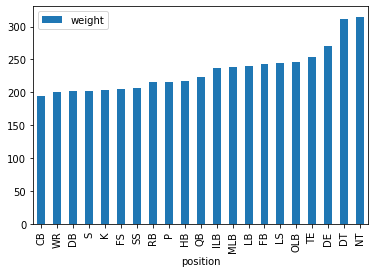

In [10]:
players.groupby(['position']).agg({'weight':'mean'}).sort_values(by='weight').plot.bar()



Lastly, I just want to ensure each player is only present once in this dataframe

In [11]:
players.displayName.value_counts().max()

2

In [12]:
players.displayName.value_counts()

Brandon Williams          2
Michael Thomas            2
Marcus Williams           2
Brandon Marshall          2
Isaiah Johnson            2
                         ..
Telvin Smith              1
LaRoy Reynolds            1
Taquan Mizzell            1
Benjamin Watson           1
DeAndre Houston-Carson    1
Name: displayName, Length: 1298, dtype: int64

As we can see, some players appear twice. Presumable, same names, different positions. Once we factor in position, we can now see that each player is indeed present only once in this dataset

In [13]:
players.groupby(['displayName','position']).size().reset_index()[0].max()

1

### Weeks Exploration

In [14]:
# pd.set_option('display.max_rows', None)
test_week[test_week.displayName=="Adam Thielen"]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
99701,2018-10-14T17:06:07.900Z,80.31,23.45,0.00,0.00,0.00,272.30,15.15,None,2541785.0,Adam Thielen,19.0,WR,1,home,2018101405,165,left,CORNER
99729,2018-10-14T17:06:08.000Z,80.31,23.45,0.00,0.00,0.00,272.30,16.69,None,2541785.0,Adam Thielen,19.0,WR,2,home,2018101405,165,left,CORNER
99757,2018-10-14T17:06:08.099Z,80.31,23.45,0.00,0.00,0.00,272.95,18.39,None,2541785.0,Adam Thielen,19.0,WR,3,home,2018101405,165,left,CORNER
99785,2018-10-14T17:06:08.200Z,80.31,23.45,0.00,0.00,0.00,272.95,24.31,None,2541785.0,Adam Thielen,19.0,WR,4,home,2018101405,165,left,CORNER
99813,2018-10-14T17:06:08.299Z,80.31,23.45,0.00,0.00,0.00,272.95,24.85,man_in_motion,2541785.0,Adam Thielen,19.0,WR,5,home,2018101405,165,left,CORNER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639512,2018-10-14T19:44:32.799Z,45.05,15.28,6.90,6.81,0.69,170.16,143.14,None,2541785.0,Adam Thielen,19.0,WR,45,home,2018101405,3578,right,OUT
639526,2018-10-14T19:44:32.900Z,45.42,14.70,6.91,6.90,0.69,189.48,150.56,None,2541785.0,Adam Thielen,19.0,WR,46,home,2018101405,3578,right,OUT
639540,2018-10-14T19:44:33.000Z,45.73,14.08,6.94,6.71,0.69,213.91,157.02,None,2541785.0,Adam Thielen,19.0,WR,47,home,2018101405,3578,right,OUT
639554,2018-10-14T19:44:33.099Z,45.96,13.43,6.92,6.47,0.69,228.72,163.38,pass_outcome_incomplete,2541785.0,Adam Thielen,19.0,WR,48,home,2018101405,3578,right,OUT


This is a very interesting dataframe. Each row appears to be an instance of a play for a given player - i.e., a snapshot in time, defined by the "frame"  variable. Each frame is accompanied by the coordinates of the player, as well as their speed and orientation information

In [15]:
test_week['displayName'].value_counts()

Football              73501
Baker Mayfield         3338
Jarvis Landry          3338
Derwin James           3338
Ben Roethlisberger     3321
                      ...  
Jacob Hollister          52
Anthony Sherman          50
Stephone Anthony         49
Nicholas Morrow          48
LeShaun Sims             38
Name: displayName, Length: 692, dtype: int64

As we can see, not only is the instance recorded for player, but it appears to be for the football as well. Let's look at the main events regarding the football

In [16]:
test_week[(test_week['displayName']=="Football")]['event'].value_counts()

None                         67783
ball_snap                     1136
pass_forward                  1038
pass_arrived                   833
pass_outcome_caught            630
tackle                         489
first_contact                  443
pass_outcome_incomplete        362
play_action                    209
out_of_bounds                  150
line_set                        75
qb_sack                         70
shift                           57
man_in_motion                   35
touchdown                       31
pass_outcome_interception       27
pass_outcome_touchdown          26
pass_tipped                     24
fumble                          20
qb_strip_sack                   11
fumble_offense_recovered        11
pass_shovel                     10
fumble_defense_recovered         9
handoff                          8
qb_spike                         5
touchback                        3
huddle_break_offense             2
timeout_home                     1
run                 

The main events for the ball have been classified. We will be able to identify the point in time at which the ball is snapped, thrown and caught - three important events that we can use in our analyses. Let's take a quick look at route running for WRs

#### Wide Receiver Route Running Exploration

In [17]:
print("Total Number of WR: ", test_week[(test_week['position']=='WR')&(test_week['frameId']==1)].displayName.value_counts().shape[0])
print("Average Snap per WR: ", test_week[(test_week['position']=='WR')&(test_week['frameId']==1)].displayName.value_counts().mean())


snaps_count = test_week[(test_week['position']=='WR')&(test_week['frameId']==1)].displayName.value_counts()
snaps_count

Total Number of WR:  136
Average Snap per WR:  22.58823529411765


Jarvis Landry               51
Antonio Callaway            50
Marquez Valdes-Scantling    48
Sterling Shepard            47
Davante Adams               46
                            ..
Josh Malone                  2
KhaDarel Hodge               1
Geremy Davis                 1
Andre Roberts                1
Victor Bolden                1
Name: displayName, Length: 136, dtype: int64

So in week 6, we have data for roughly 136 WRs. On average each WR has played in roughly 22-23 snaps, with the highest snap count belonging to Jarvis Landry, with 51 snaps. Let's limit the number of WRs we are looking at by focusing on WR in the top 25% of snaps played.

In [18]:
perc = test_week[(test_week['position']=='WR')&(test_week['frameId']==1)].displayName.value_counts().quantile(0.75) 
print("75th Percentile fo Snaps Played: ", perc)

75th Percentile fo Snaps Played:  32.0


In [19]:
players_to_retain = snaps_count[snaps_count>perc].reset_index()['index'].tolist()

Let's create a table that looks at the most played WR, and looks at the distirbution of route ran

In [20]:
# Create WR dataframe - retain WR in the 75th percentile of snaps played
wr_routes = test_week[(test_week['displayName'].isin(players_to_retain))&(test_week['frameId']==1)]

# Re format the dataframe to get the number of route ran by WR and route type
wr_routes = wr_routes.groupby(['displayName','route']).size().reset_index()
wr_routes.rename({0:'count'}, axis=1, inplace=True)

# Finalize the format and convert the raw number to percentage
wr_routes = wr_routes.pivot(index='displayName', columns='route', values='count').fillna(0)
wr_routes = wr_routes.div(wr_routes.sum(axis=1), axis=0)

Let's look at the heatmap of route ran

<AxesSubplot:xlabel='route', ylabel='displayName'>

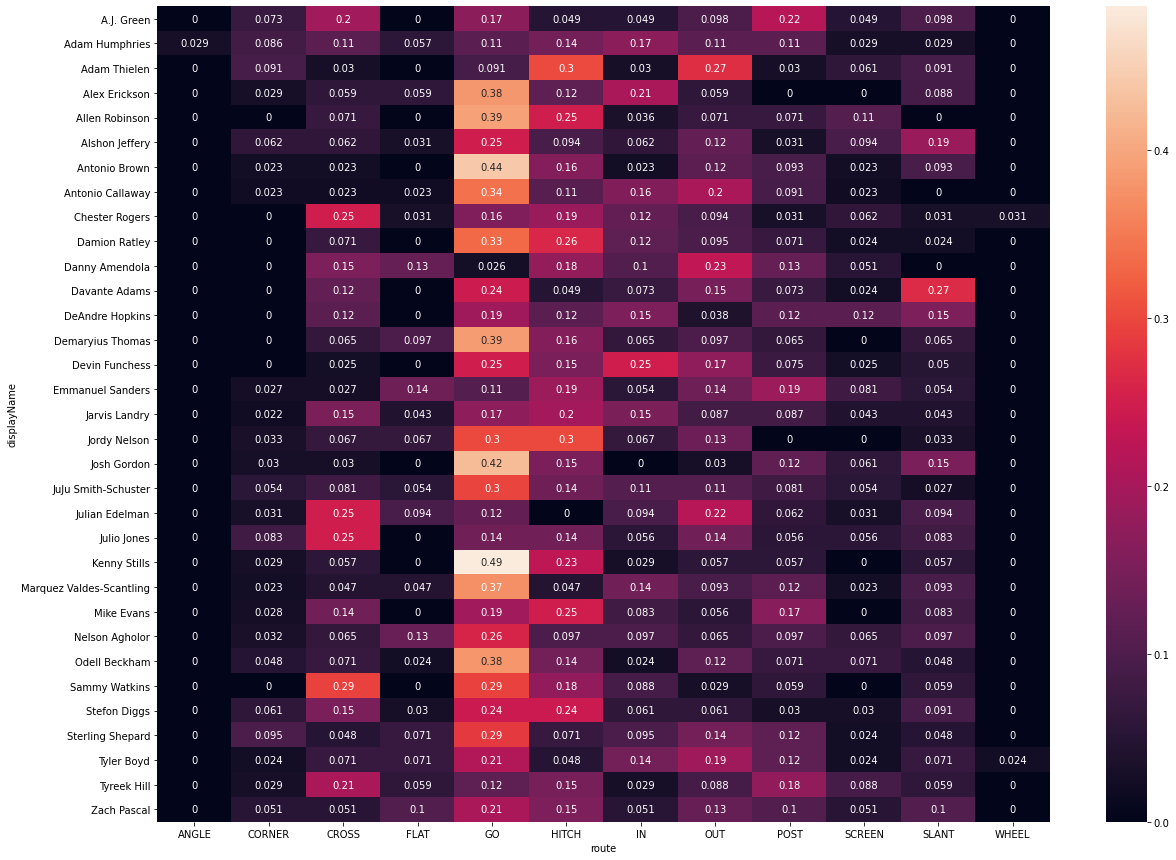

In [21]:
fig, ax = plt.subplots(figsize = (20, 15))
sn.heatmap(wr_routes, annot = True)

A couple of interesting insights from this heat map. First, we can see that most of the routes ran are go routes. This is not entirely surprising - there should be one or two deep threat options on almost every play. However, there are some pattern that emerge, that can point to the type of player. For example, we have some "deep threats" archetypes, like Antonio Brown, MVS, Allen Robinson. Conversely, slower and shorter players like Julian Edelman are not used on Go routes nearly as much, but have a more diverse route tree. Edelman also plays the slot, which explain why his % of go routes is a lot smaller.

However, we cannot make generalization from this particular chart, since this is only reflective of one week. For example, Davante Adams ran 27% of his routes as slants. He was most likely schemed in that role in that particular matchup, since someone like Adams typically has a much more diverse route tree over the course of the season.

But this heatmap is a good reflection of how we can use the aggregated data over the season to identify players archetype. More on that later. Now let's visually plot some of these routes

#### Preliminary Route Visuals

In [22]:
test_week[(test_week['playId']==165)&(test_week['displayName']=="Adam Thielen")]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
99701,2018-10-14T17:06:07.900Z,80.31,23.45,0.00,0.00,0.00,272.30,15.15,None,2541785.0,Adam Thielen,19.0,WR,1,home,2018101405,165,left,CORNER
99729,2018-10-14T17:06:08.000Z,80.31,23.45,0.00,0.00,0.00,272.30,16.69,None,2541785.0,Adam Thielen,19.0,WR,2,home,2018101405,165,left,CORNER
99757,2018-10-14T17:06:08.099Z,80.31,23.45,0.00,0.00,0.00,272.95,18.39,None,2541785.0,Adam Thielen,19.0,WR,3,home,2018101405,165,left,CORNER
99785,2018-10-14T17:06:08.200Z,80.31,23.45,0.00,0.00,0.00,272.95,24.31,None,2541785.0,Adam Thielen,19.0,WR,4,home,2018101405,165,left,CORNER
99813,2018-10-14T17:06:08.299Z,80.31,23.45,0.00,0.00,0.00,272.95,24.85,man_in_motion,2541785.0,Adam Thielen,19.0,WR,5,home,2018101405,165,left,CORNER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100750,2018-10-14T17:06:14.900Z,60.36,13.62,3.94,2.07,0.40,129.89,207.57,None,2541785.0,Adam Thielen,19.0,WR,71,home,2018101405,165,left,CORNER
100764,2018-10-14T17:06:15.000Z,60.20,13.27,3.71,2.41,0.38,127.24,204.15,None,2541785.0,Adam Thielen,19.0,WR,72,home,2018101405,165,left,CORNER
100778,2018-10-14T17:06:15.099Z,60.06,12.94,3.52,2.41,0.36,126.15,201.81,None,2541785.0,Adam Thielen,19.0,WR,73,home,2018101405,165,left,CORNER
100792,2018-10-14T17:06:15.200Z,59.96,12.62,3.20,3.05,0.33,136.99,195.97,out_of_bounds,2541785.0,Adam Thielen,19.0,WR,74,home,2018101405,165,left,CORNER


The below shows the route ran by Adam Thielen on play 165. The route has been identified as a slant route.

<AxesSubplot:xlabel='x', ylabel='y'>

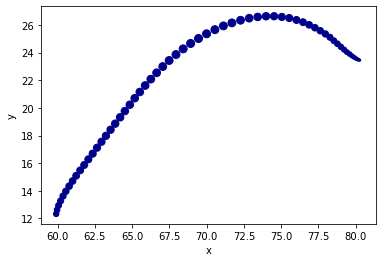

In [23]:
test_week_2 = test_week.copy()
test_week_2['speed'] = test_week_2['s']*10

test_week_2[(test_week_2['playId']==165)&(test_week_2['displayName']=="Adam Thielen")].plot.scatter(x='x',
                      y='y', s='speed',
                      c='DarkBlue')

In this example, Thielen started his route at the top right of the screen. Each dot represents his position in a given frame. The size of the dot represents his speed at that instance. Although not overwhelmingly apparent at this scale, we can see a burst of accelaration as he started his route, keep a relatively constant speed throughout, and then a decceleration towards the end. Now, let's do two things - let's add in every other player on this play, and let's position them relative to the entire field:

(0.0, 54.0)

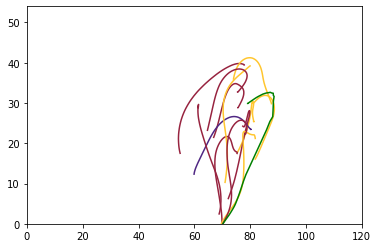

In [24]:
test_play = test_week[(test_week['playId']==165)]

for player in test_play['displayName'].unique():
    if player=="Adam Thielen":
        color="#4F2683"
    elif test_play[test_play['displayName']==player]['team'].unique()=="home":
        color="#FFC62F"
    elif test_play[test_play['displayName']==player]['team'].unique()=="away":
        color="#97233F"
    else:
        color="g"
    plt.plot(test_play[(test_play['displayName']==player)]["x"],test_play[(test_play['displayName']==player)]["y"],
            color=color)
    
plt.xlim([0, 120])
plt.ylim([0, 54])

Let's unpack this graph. First, colored in purple in the middle of the field, is the route Adam Thielen ran, at scale. In yellow are all of the other Vikings players, and in maroon, we have the cardinals players. The green line represents the trajectory of the ball, and the yellow line closest to it at the beginning of the play, is the quarterback, Kirk Cousins. This is a play action bootleg play - Cousins gets the ball, starts running to his right to his RB, fakes a handoff to the RB in the backfield, rolls over to his left, and throws the ball to his WR on an out route for a game of about 10 yards

## Route Visualizations

Now that we have a better understanding of the data, let us play around with some of the visualizations. We've seen what kind of visuals this dataset can generate, now let's try to enhance those, using plotly. Let us revisit the previous play using plotly

In [71]:
test_play = test_week[(test_week['playId']==165)]

fig = px.scatter(test_play, 
                 x="x", 
                 y="y",
                 size="s",
                 color="team",
                 hover_name="displayName",
                 size_max=10, 
                 range_x=[0,120], 
                 range_y=[0,54])

fig.update_layout(template='plotly')
fig.show()

In [72]:
fig.update_layout(plot_bgcolor='#567d46')
fig.update_yaxes(showgrid=False, showticklabels=False, visible=False)
fig.update_xaxes(nticks=20)
fig.add_annotation(x=4, y=4,
            text="Text annotation without arrow",
            showarrow=False,
            yshift=10,textangle=-90)

# Add shape regions
fig.add_vrect(
    x0=0, 
    x1=10,
    fillcolor="#97233F", opacity=0.5,
    layer="below", line_width=0,
)

fig.add_vrect(
    x0=110, 
    x1=120,
    fillcolor="#97233F", opacity=0.5,
    layer="above", line_width=0,
)

fig.show()

In [38]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
    x=test_play.x,
    y=test_play.y,
    mode='markers',
#     marker_color = test_play.team,
    marker=dict(size=test_play.s)
))

fig.show()

In [28]:
test_play = test_week[(test_week['playId']==165)&(test_week['displayName']=="Adam Thielen")]

fig = px.scatter(test_play, x="x", y="y",
        size="s",size_max=15, range_x=[0,120], range_y=[0,54]
                )
fig.show()

In [29]:
test_play = test_week[(test_week['playId']==165)&(test_week['displayName']=="Adam Thielen")]


fig = px.scatter(test_play, x="x", y="y",
        size="s",size_max=30,animation_frame="frameId",range_x=[0,120], range_y=[0,54]
                )
fig.show()

In [30]:
fig = px.scatter(test_week[(test_week['playId']==165)], x="x", y="y",
        size="s",color="team",
                 hover_name="displayName",size_max=15)
fig.show()

In [103]:
week6[(week6['playId']==165)]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
99694,2018-10-14T17:06:07.900Z,81.28,25.39,0.00,0.00,0.00,249.07,309.14,None,2495438.0,Kyle Rudolph,82.0,TE,1,home,2018101405,165,left,NaN
99695,2018-10-14T17:06:07.900Z,77.90,39.47,0.00,0.00,0.00,109.69,35.19,None,2495504.0,Patrick Peterson,21.0,CB,1,away,2018101405,165,left,NaN
99696,2018-10-14T17:06:07.900Z,77.37,24.25,0.21,0.19,0.05,93.38,141.45,None,2495807.0,Antoine Bethea,41.0,FS,1,away,2018101405,165,left,NaN
99697,2018-10-14T17:06:07.900Z,75.56,28.82,0.00,0.00,0.00,112.88,94.48,None,2530491.0,Josh Bynes,57.0,ILB,1,away,2018101405,165,left,NaN
99698,2018-10-14T17:06:07.900Z,81.10,29.90,0.00,0.00,0.00,253.41,95.57,None,2532820.0,Kirk Cousins,8.0,QB,1,home,2018101405,165,left,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100809,2018-10-14T17:06:15.299Z,71.01,10.29,1.77,2.87,0.19,198.09,189.91,None,2552608.0,Stefon Diggs,14.0,WR,75,home,2018101405,165,left,CROSS
100810,2018-10-14T17:06:15.299Z,69.15,-0.77,6.21,3.43,0.63,223.77,211.64,None,2555214.0,Laquon Treadwell,11.0,WR,75,home,2018101405,165,left,OUT
100811,2018-10-14T17:06:15.299Z,64.70,23.22,5.56,1.68,0.56,200.07,199.36,None,2557887.0,Haason Reddick,43.0,ILB,75,away,2018101405,165,left,NaN
100812,2018-10-14T17:06:15.299Z,70.03,-0.27,5.16,3.72,0.51,245.86,218.47,None,2558009.0,Budda Baker,36.0,FS,75,away,2018101405,165,left,NaN


In [17]:
a = test_play['displayName'].unique()


In [18]:
a

array(['Kyle Rudolph', 'Patrick Peterson', 'Antoine Bethea', 'Josh Bynes',
       'Kirk Cousins', 'Jamar Taylor', 'Latavius Murray', 'Adam Thielen',
       'Tre Boston', "Bene' Benwikere", 'Stefon Diggs',
       'Laquon Treadwell', 'Haason Reddick', 'Budda Baker', 'Football'],
      dtype=object)

In [39]:
data= pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv")


In [40]:
data.head()

,Rank,State,Postal,Population
0,1,Alabama,AL,4849377.0
1,2,Alaska,AK,736732.0
2,3,Arizona,AZ,6731484.0
3,4,Arkansas,AR,2966369.0
4,5,California,CA,38802500.0
